### Jason Benjamin 
### Data Science Practicum
### Professor Keiana Dunn
### 12/2022

### Nothing in cryptocurrency makes sense except in the light of market volatality...

This project was designed to load historical data from Apple, Microsoft, Google, Amazon, Gold, Bitcoin, and Ethereum. 
I will attempt to use scikit-learn to run linear regression on the data to make predictions based on the open and low value. 
The data will be loaded using pandas and visualized with matplotlib.
The visualizations will illustrate the monthly stock price from December 1, 2017 through December 1, 2022.
If I started by investing $1000 in 2017 where would I receive the highest return on my investment?

In [1]:
# Load the necessary libraries:

import os
import numpy as np
import pandas as pd
import sklearn as sk
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

# Ignore warnings:

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the historicaal data and store the data frames in seperate variables.

aapl  = pd.read_csv('aapl.csv')
amzn  = pd.read_csv('amzn.csv')
btc   = pd.read_csv('btc.csv')
eth   = pd.read_csv('eth.csv')
gold  = pd.read_csv('gold.csv')
googl = pd.read_csv('googl.csv')
msft  = pd.read_csv('msft.csv')

# These commands may be useful for future development. 
# df.sort_values(by='Date', ascending=False) Sort Values.
# Bit_df = Bit_df.replace(',','', regex=True) Remove commas from numbers.
# Bit_df['Price'] = Bit_df['Price'].astype(float) Change data type to number.
# aapl = aapl_df.drop(columns = ['Price', 'Open', 'Low', 'Vol.', 'Change %']) Drop unnecessary columns.

In [3]:
# Preview the data frame.

aapl.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,12/01/2022,129.93,148.21,150.92,125.87,1.68B,-12.23%
1,11/01/2022,148.03,155.25,155.38,134.40,80.38M,-3.46%
2,10/01/2022,153.34,138.21,157.50,134.37,1.87B,10.96%
3,09/01/2022,138.20,156.64,164.26,138.00,2.08B,-12.10%
4,08/01/2022,157.22,161.01,176.15,157.14,1.51B,-3.26%


In [4]:
# Check the data types:

aapl.dtypes

Date         object
Price       float64
Open        float64
High        float64
Low         float64
Vol.         object
Change %     object
dtype: object

In [5]:
amzn.dtypes

Date         object
Price       float64
Open        float64
High        float64
Low         float64
Vol.         object
Change %     object
dtype: object

In [6]:
btc.dtypes

Date        object
Price       object
Open        object
High        object
Low         object
Vol.        object
Change %    object
dtype: object

In [7]:
eth.dtypes

Date        object
Price       object
Open        object
High        object
Low         object
Vol.        object
Change %    object
dtype: object

In [8]:
gold.dtypes

Date        object
Price       object
Open        object
High        object
Low         object
Vol.        object
Change %    object
dtype: object

In [9]:
googl.dtypes

Date         object
Price       float64
Open        float64
High        float64
Low         float64
Vol.         object
Change %     object
dtype: object

In [10]:
msft.dtypes

Date         object
Price       float64
Open        float64
High        float64
Low         float64
Vol.         object
Change %     object
dtype: object

In [11]:
# We need to remove all the commas from the data frames so that we can convert them to numerical values.

btc  = btc.replace(',','', regex=True) 
eth  = eth.replace(',','', regex=True) 
gold = gold.replace(',','', regex=True) 

# Change Price, Open, High, and Low to floats.

btc['Price']  = btc['Price'].astype(float)
btc['Open']   = btc['Open'].astype(float)
btc['High']   = btc['High'].astype(float)
btc['Low']    = btc['Low'].astype(float)

eth['Price']  = eth['Price'].astype(float)
eth['Open']   = eth['Open'].astype(float)
eth['High']   = eth['High'].astype(float)
eth['Low']    = eth['Low'].astype(float)

gold['Price'] = gold['Price'].astype(float)
gold['Open']  = gold['Open'].astype(float)
gold['High']  = gold['High'].astype(float)
gold['Low']   = gold['Low'].astype(float)

btc.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,Dec 22,16537.4,17163.4,18351.8,16331.2,6.61M,-3.65%
1,Nov 22,17163.9,20496.1,21464.7,15504.2,10.30M,-16.26%
2,Oct 22,20496.3,19422.9,21038.1,18207.9,8.29M,5.53%
3,Sep 22,19423.0,20049.9,22702.5,18191.8,10.91M,-3.10%
4,Aug 22,20043.9,23303.4,25205.7,19542.9,6.55M,-13.99%


In [12]:
gold.dtypes

Date         object
Price       float64
Open        float64
High        float64
Low         float64
Vol.         object
Change %     object
dtype: object

## Apple Case Study

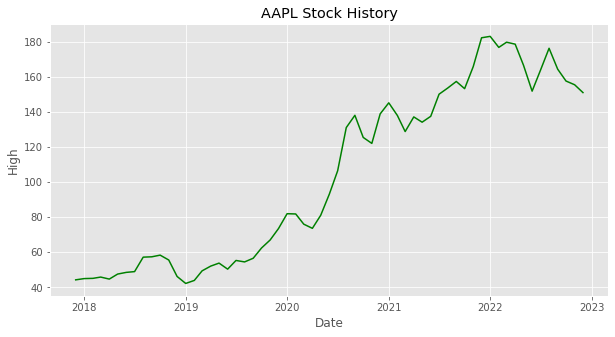

In [13]:
# Let's make sure the date column is actually a date in pandas.
aapl["Date"] = pd.to_datetime(aapl["Date"])

# Define X and Y axis.
date = aapl["Date"]
high = aapl["High"]

# Plot the graph
fig, ax = plt.subplots(figsize=(10, 5))
ax.set_xlabel('Date')
ax.set_ylabel('High')
ax.set_title('AAPL Stock History')
ax.plot(date, high, color = "green")
plt.savefig('aapl.png', dpi=300);

In [14]:
# In December of 2017 Apple's high was $44.30 
# In December of 2022 Apple's high was $150.92

begin_value = 44.3
end_value   = 150.92
shares      = (1000/begin_value) 
aapl_total  = (shares * end_value)

print(aapl_total)

3406.7720090293456


In [15]:
# Build linear regression model using Open and Low values as predictors.
# Split data into predictors X and output Y.

predictors = ['Open', 'Low']
X = aapl[predictors]
y = aapl['High']

# Initialize and fit the model.

lm = LinearRegression()
model = lm.fit(X, y)

print(f'alpha = {model.intercept_}')
print(f'betas = {model.coef_}')

alpha = 0.8956691308689386
betas = [0.52185345 0.58605666]


In [16]:
# Predictions in numpy array. 

predict_array = model.predict(X)
print(predict_array)

[152.00652139 160.67943302 151.76946851 163.51461331 177.01223742
 151.39305961 154.74625334 160.39229764 182.77530964 174.80681922
 180.78400105 184.35983422 180.77542665 165.07825157 155.98072873
 163.44275694 161.95932813 151.74390321 138.33025579 141.44662595
 137.21414763 133.58067859 140.07681664 144.63938308 134.37781545
 120.73070032 125.41653293 130.59937534 120.58986598 100.77154315
  88.82600071  80.11911128  67.76441498  68.87177886  78.15865127
  82.43762293  73.31456718  69.95435699  61.7784902   57.74671842
  57.02302005  56.46901643  48.75346781  53.91729875  53.49507627
  48.4699054   46.98746259  41.90684632  46.44252703  54.41493573
  60.82973662  62.2409314   55.78370914  51.74553324  51.9008214
  46.82063404  46.33389409  48.3491049   44.71621314  47.22326778
  47.46090061]


In [17]:
# Predict the High based on hypothetical Open and Low values.

new_X = [[175, 150]]
print(model.predict(new_X))

[180.12852264]


## Amazon Case Study

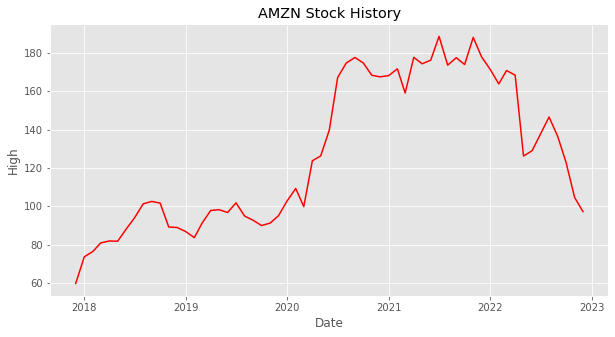

In [48]:
# Let's make sure the date column is actually a date in pandas.
amzn["Date"] = pd.to_datetime(aapl["Date"])

# Define X and Y axis.
date = amzn["Date"]
high = amzn["High"]

# Plot the graph.
fig, ax = plt.subplots(figsize=(10, 5))
ax.set_xlabel('Date')
ax.set_ylabel('High')
ax.set_title('AMZN Stock History')
ax.plot(date, high, color = "red")
plt.savefig('amzn.png', dpi=300);

In [19]:
# In December of 2017 Amazon's high was $59.74 
# In December of 2022 Amazon's high was $97.23

begin_value = 59.74
end_value   = 97.23
shares      = (1000/begin_value) 
amzn_total  = (shares * end_value)

print(amzn_total)

1627.5527284901239


In [20]:
# Build linear regression model using Open and Low values as predictors.
# Split data into predictors X and output Y.

predictors = ['Open', 'Low']
X = amzn[predictors]
y = amzn['High']

# Initialize and fit the model.

lm = LinearRegression()
model = lm.fit(X, y)

print(f'alpha = {model.intercept_}')
print(f'betas = {model.coef_}')

alpha = 3.7079906584699103
betas = [0.63223969 0.44274956]


In [21]:
# Predictions in numpy array. 

predict_array = model.predict(X)
print(predict_array)

[101.19713005 107.47350106 118.75669703 132.98470769 145.14913888
 117.77378858 125.91370341 125.92694954 161.34176525 159.40801772
 159.78949127 169.56590418 188.91470358 182.67178345 177.99286583
 186.71423679 180.00717785 185.49115292 176.46280942 183.10218349
 171.24568529 166.36203039 173.43378291 175.3954376  172.53000734
 165.80755288 171.95228353 177.57787165 172.28153896 151.86045876
 135.04759049 127.52988177 106.63608044  99.96861743 107.36244716
 103.16883946  99.15718011  98.36866633  96.2041663   97.4985809
 101.47821018 105.43888897  96.35894687 104.059278   100.43678087
  91.15547026  90.19871165  82.36872594  88.57592005  86.46842771
 100.31119614 109.05291284  99.41993222  94.05132653  91.65158608
  87.34838607  78.46872035  81.7779756   77.41335563  66.67136843
  65.65747193]


In [22]:
# Predict the High based on hypothetical Open and Low values.

new_X = [[100, 90]]
print(model.predict(new_X))

[106.77942037]


## Bitcoin Case Study

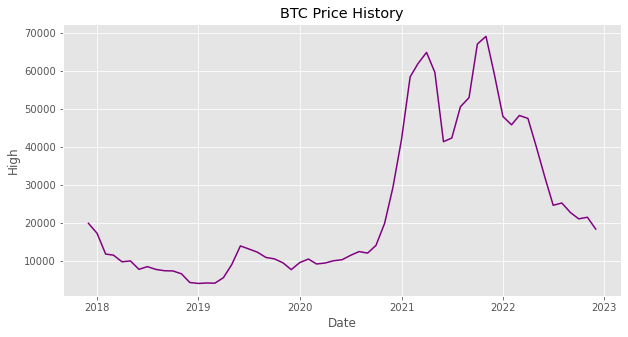

In [23]:
# Let's make sure the date column is actually a date in pandas.
btc["Date"] = pd.to_datetime(aapl["Date"])

# Define X and Y axis.
date = btc["Date"]
high = btc["High"]

# Plot the graph
fig, ax = plt.subplots(figsize=(10, 5))
ax.set_xlabel('Date')
ax.set_ylabel('High')
ax.set_title('BTC Price History')
ax.plot(date, high, color = "purple")
plt.savefig('btc.png', dpi=300);

In [24]:
# In December of 2017 Bitcoin's high was $19870.6
# In November of 2021 Bitcoin was worth almost $69000
# In December of 2022 Bitcoin's high was $18351.8

begin_value = 19870.6
end_value   = 18351.8
shares      = (1000/begin_value) 
btc_total   = (shares * end_value)

print(btc_total)

923.5654685817238


In [25]:
# Build linear regression model using Open and Low values as predictors.
# Split data into predictors X and output Y.

predictors = ['Open', 'Low']
X = btc[predictors]
y = btc['High']

# Initialize and fit the model.

lm = LinearRegression()
model = lm.fit(X, y)

print(f'alpha = {model.intercept_}')
print(f'betas = {model.coef_}')

alpha = 249.35792955266515
betas = [0.44669935 0.8692493 ]


In [26]:
# Predictions in numpy array. 

predict_array = model.predict(X)
print(predict_array)

[22112.12163136 22881.96737132 24752.75896246 25018.84453863
 27646.6235881  25487.57613673 29776.61466591 40099.55575043
 53267.42908629 51861.5662733  47301.52914088 49567.39461877
 62682.25839361 74096.43679308 57458.01171159 55764.89384156
 51271.69552684 41375.41950333 42031.56672906 52337.40365051
 67439.17903153 59546.39157944 43136.54049284 37698.80522996
 24347.22688884 22578.64993334 14092.67211669 14036.47670215
 14639.54440703 14509.0537266  12178.83270392 11262.5374307
  8466.08844757  7429.42796269 11852.28935824  9447.98420018
  9237.63736202 10018.41203023 10321.16397102 11271.11695997
 12874.33226357 12978.31391245 10574.05201715  7250.26146393
  5625.60819754  5154.67739133  4725.21202411  4834.19464135
  4815.04760009  6252.02709726  8459.13002273  8586.22946852
  8828.76696338  8669.4553326   8629.58774045 10524.5567449
  8964.4867558  10606.38885869 10047.80309953 14495.43824378
 12881.83171212]


In [27]:
# Predict the High based on hypothetical Open and Low values.

new_X = [[50000, 40000]]
print(model.predict(new_X))

[57354.29717608]


## Ethereum Case Study

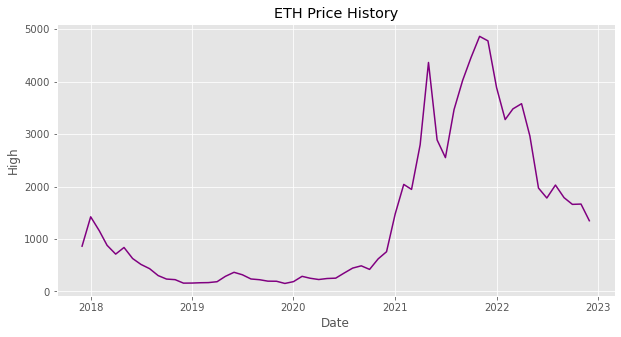

In [28]:
# Let's make sure the date column is actually a date in pandas.
eth["Date"] = pd.to_datetime(aapl["Date"])

# Define X and Y axis.
date = eth["Date"]
high = eth["High"]

# Plot the graph
fig, ax = plt.subplots(figsize=(10, 5))
ax.set_xlabel('Date')
ax.set_ylabel('High')
ax.set_title('ETH Price History')
ax.plot(date, high, color = "purple")
plt.savefig('eth.png', dpi=300);

In [29]:
# In December of 2017 Ethereum's high was $863
# In December of 2022 Ethereum's high was $1348.43

begin_value = 863
end_value   = 1348.43
shares      = (1000/begin_value) 
eth_total   = (shares * end_value)

print(eth_total)

1562.4913093858634


In [30]:
# Build linear regression model using Open and Low values as predictors.
# Split data into predictors X and output Y.

predictors = ['Open', 'Low']
X = eth[predictors]
y = eth['High']

# Initialize and fit the model.

lm = LinearRegression()
model = lm.fit(X, y)

print(f'alpha = {model.intercept_}')
print(f'betas = {model.coef_}')

alpha = 81.23324776325512
betas = [0.69711704 0.5809587 ]


In [31]:
# Predictions in numpy array. 

predict_array = model.predict(X)
print(predict_array)

[1653.15967753 1803.00170055 1702.70617438 1875.05048622 2079.85282903
 1414.64066529 1948.09194686 2975.04848071 3947.46533113 3540.55180332
 3292.2497923  3900.78487608 5360.53151638 5345.92483323 3899.53172996
 4017.28235078 3266.32332621 2666.48157905 2960.82028357 3024.64574321
 2521.1747739  1890.43183199 1735.36356039 1009.6933742   819.62044711
  566.08382455  525.95093294  566.20191457  517.83305097  368.3715201
  368.95691973  328.07919598  248.76916449  284.27801922  311.13351086
  244.53758392  255.19974101  284.93219012  296.67691861  289.85791733
  294.25541323  397.02450181  399.89641096  286.33995811  261.54879699
  247.27485222  215.06397586  232.2083886   205.64872475  279.39627424
  353.11995224  376.00692174  528.03183338  640.08528893  720.01521613
  843.34966645  564.81591416  888.18429314 1191.15235065 1011.9416543
  609.1080943 ]


In [32]:
# Predict the High based on hypothetical Open and Low values.

new_X = [[1300, 900]]
print(model.predict(new_X)) 

[1510.34822355]


## Gold Case Study

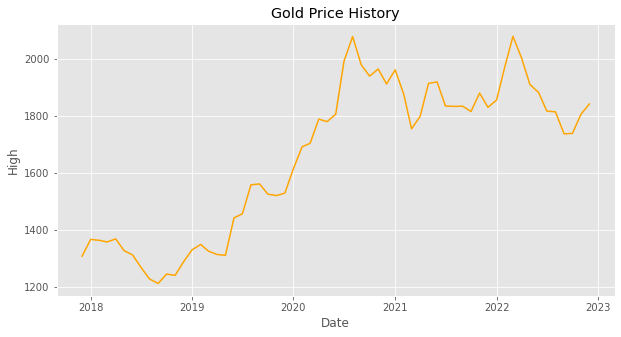

In [33]:
# Let's make sure the date column is actually a date in pandas.
gold["Date"] = pd.to_datetime(aapl["Date"])

# Define X and Y axis.
date = gold["Date"]
high = gold["High"]

# Plot the graph
fig, ax = plt.subplots(figsize=(10, 5))
ax.set_xlabel('Date')
ax.set_ylabel('High')
ax.set_title('Gold Price History')
ax.plot(date, high, color = "orange")
plt.savefig('gold.png', dpi=300);

In [34]:
# In December of 2017 Gold's high was $1308.8
# In December of 2022 Gold's high was $1841.9

begin_value = 1308.8
end_value   = 1841.9
shares      = (1000/begin_value) 
gold_total  = (shares * end_value)

print(gold_total)

1407.3196821515894


In [35]:
# Build linear regression model using Open and Low values as predictors.
# Split data into predictors X and output Y.

predictors = ['Open', 'Low']
X = gold[predictors]
y = gold['High']

# Initialize and fit the model.

lm = LinearRegression()
model = lm.fit(X, y)

print(f'alpha = {model.intercept_}')
print(f'betas = {model.coef_}')

alpha = -79.4677434426444
betas = [0.40538318 0.70085498]


In [36]:
# Predictions in numpy array. 

predict_array = model.predict(X)
print(predict_array)

[1889.56123661 1733.44962707 1733.88085923 1746.91007791 1846.17502315
 1833.7961795  1932.25147876 1943.0610967  2026.67726693 2019.72550565
 1903.25518258 1909.02861886 1869.65909253 1879.46064756 1856.14385452
 1863.39553079 1831.05385529 1880.98339601 1924.70883897 1882.55211035
 1809.27104124 1800.96757114 1882.04244446 1962.45866541 1888.63642021
 1925.66276206 1997.16096107 2017.31695081 2032.39347423 1894.24570187
 1801.49100706 1787.83671844 1669.39572408 1585.39476061 1655.34965378
 1607.46022828 1539.6752392  1552.46794446 1546.44113555 1572.14599114
 1481.53450301 1461.11377413 1371.34846759 1332.93717156 1335.00934089
 1353.32964217 1372.4758396  1338.88958776 1277.93043782 1256.91177689
 1236.62507898 1237.74430962 1233.30795792 1280.11095767 1326.35714014
 1352.30790688 1382.44097279 1369.24247642 1384.48902253 1370.10962335
 1306.44013821]


In [37]:
# Predict the High based on hypothetical Open and Low values.

new_X = [[1900, 1500]]
print(model.predict(new_X)) 

[1742.04276023]


## Google Case Study

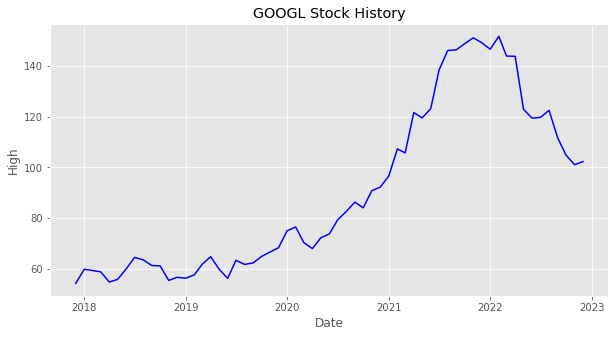

In [38]:
# Let's make sure the date column is actually a date in pandas.
googl["Date"] = pd.to_datetime(aapl["Date"])

# Define X and Y axis.
date = googl["Date"]
high = googl["High"]

# Plot the graph
fig, ax = plt.subplots(figsize=(10, 5))
ax.set_xlabel('Date')
ax.set_ylabel('High')
ax.set_title('GOOGL Stock History')
ax.plot(date, high, color = "blue")
plt.savefig('googl.png', dpi=300);

In [39]:
# In December of 2017 Google's high was $54.32
# In December of 2022 Google's high was $102.25

begin_value = 54.32
end_value   = 102.25
shares      = (1000/begin_value) 
googl_total = (shares * end_value)

print(googl_total)

1882.3637702503681


In [40]:
# Build linear regression model using Open and Low values as predictors.
# Split data into predictors X and output Y.

predictors = ['Open', 'Low']
X = googl[predictors]
y = googl['High']

# Initialize and fit the model.

lm = LinearRegression()
model = lm.fit(X, y)

print(f'alpha = {model.intercept_}')
print(f'betas = {model.coef_}')

alpha = 1.0617955644241022
betas = [0.65108435 0.42839407]


In [41]:
# Predictions in numpy array. 

predict_array = model.predict(X)
print(predict_array)

[103.65052322  98.9101588  103.38729315 112.49854658 122.31270216
 115.91630061 120.84814135 118.53954899 140.18521017 142.54926213
 144.17233068 148.8366426  154.50180418 158.11543428 144.74112965
 152.68533868 146.14981071 132.3745143  128.25787119 125.03878185
 113.9688976  110.44372206 100.62209049  94.68931967  94.85705416
  88.4496693   80.0579519   84.23149782  80.95857998  77.55448592
  76.42847031  71.92351545  60.67891745  66.66376214  75.80750802
  73.79739142  70.81988082  69.25346672  65.77147031  64.4626209
  65.17824811  60.3671324   57.79518127  63.68322744  65.06269367
  62.08916461  61.01872634  56.40099278  58.8595829   58.05829553
  62.1239869   65.52951259  67.19230507  61.07581381  60.97832102
  55.73016871  55.80997882  58.26094369  60.70099988  57.89633452
  56.0767722 ]


In [42]:
# Predict the High based on hypothetical Open and Low values.

new_X = [[105, 85]]
print(model.predict(new_X)) 

[105.83914851]


## Microsoft Case Study

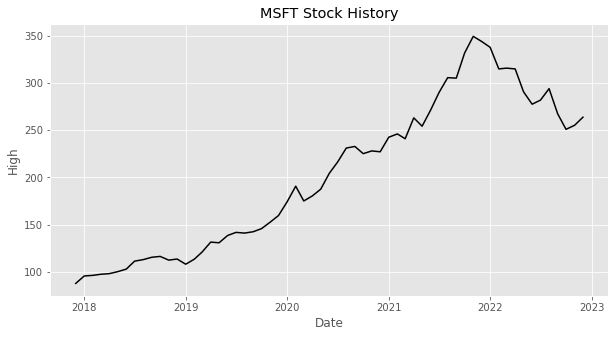

In [43]:
# Let's make sure the date column is actually a date in pandas.
msft["Date"] = pd.to_datetime(aapl["Date"])

# Define X and Y axis.
date = msft["Date"]
high = msft["High"]

# Plot the graph
fig, ax = plt.subplots(figsize=(10, 5))
ax.set_xlabel('Date')
ax.set_ylabel('High')
ax.set_title('MSFT Stock History')
ax.plot(date, high, color = "black")
plt.savefig('msft.png', dpi=300);

In [44]:
# In December of 2017 Microsoft's high was $87.5
# In December of 2022 Microsoft's high was $263.92

begin_value = 87.5
end_value   = 263.92
shares      = (1000/begin_value) 
msft_total  = (shares * end_value)

print(msft_total)

3016.2285714285717


In [45]:
# Build linear regression model using Open and Low values as predictors.
# Split data into predictors X and output Y.

predictors = ['Open', 'Low']
X = msft[predictors]
y = msft['High']

# Initialize and fit the model.

lm = LinearRegression()
model = lm.fit(X, y)

print(f'alpha = {model.intercept_}')
print(f'betas = {model.coef_}')

alpha = 1.2006260025690665
betas = [0.616142   0.46473455]


In [46]:
# Predictions in numpy array. 

predict_array = model.predict(X)
print(predict_array)

[266.30806519 244.93583461 248.08389658 268.85897779 293.51490475
 273.4700891  283.000946   286.83860377 317.29480552 309.3034438
 318.64198972 336.11381867 355.12533107 357.04085487 305.26846526
 318.68393663 309.50283092 292.61110586 268.9244768  267.97036358
 258.76206886 250.76989442 251.93467423 236.80654621 230.54988859
 220.07495373 225.51109284 231.3509642  225.93315873 218.15343325
 197.9507977  190.28925475 165.34783925 164.64168279 176.84935894
 171.7672575  162.89046507 156.52372248 149.16295474 147.88322922
 146.39006471 147.96990959 132.81787173 138.80658053 129.3758675
 121.32001564 112.70942416 107.70976056 114.49113047 113.33000483
 118.42749648 119.33345271 115.2529327  107.18814231 107.57128629
 101.59593116  97.61191339  99.58089736  98.56342366  94.00374066
  90.21417555]


In [47]:
# Predict the High based on hypothetical Open and Low values.

new_X = [[285, 105]]
print(model.predict(new_X))

[225.59822358]


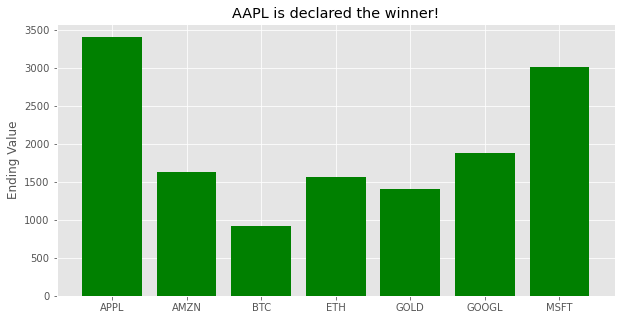

In [62]:
fig, ax = plt.subplots(figsize=(10, 5))

assets = ['APPL', 'AMZN', 'BTC', 'ETH', 'GOLD', 'GOOGL', 'MSFT']
value = [3406.77, 1627.55, 923.57, 1562.49, 1407.32, 1882.36, 3016.23]
ax.bar(assets, value, color='green')

ax.set_ylabel('Ending Value')
ax.set_title('AAPL is declared the winner!')
plt.show()
#plt.savefig('results.png', dpi=300);